Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_16304\1999713227.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", palette="viridis")


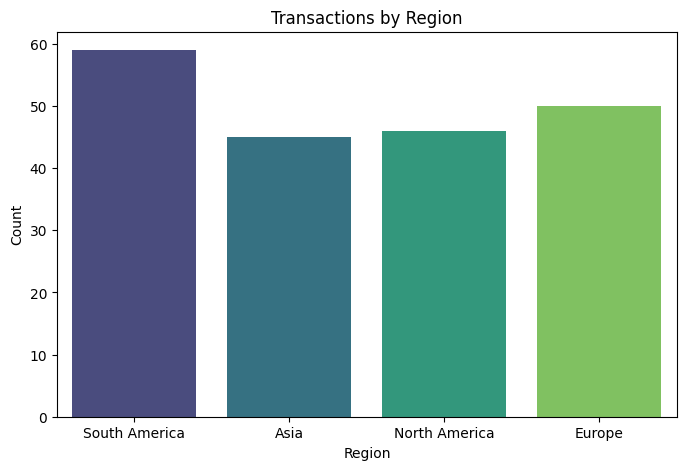

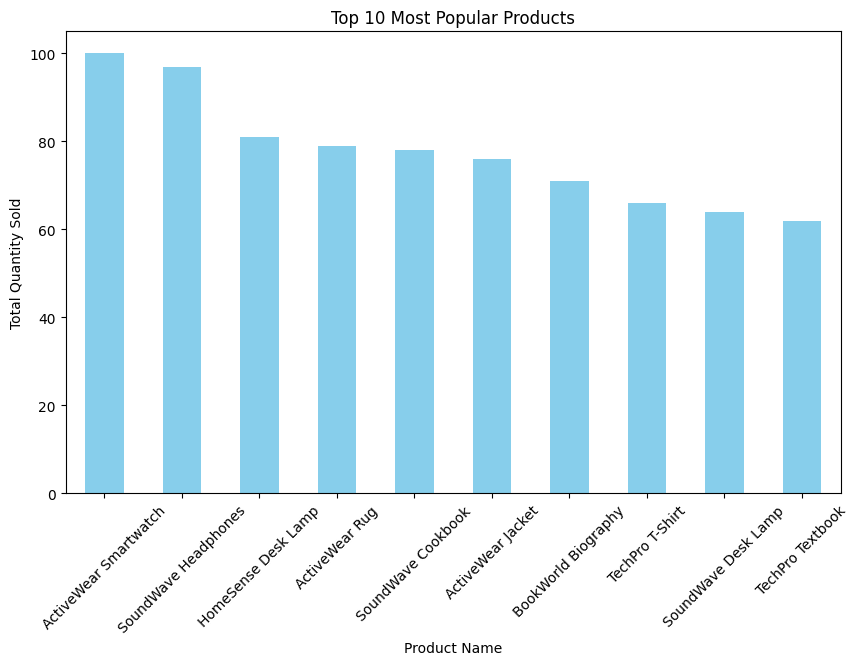


Business Insights:
1. The dataset has 200 customers from 4 unique regions.
2. The most popular product is 'ActiveWear Smartwatch' based on the highest quantity sold.
3. The average transaction value is 690.00 USD.
4. 69 customers signed up in the first quarter of the year.
5. The category 'Books' generates the most revenue.


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display first few rows of each dataset
print("Customers Dataset:")
print(customers.head())

print("\nProducts Dataset:")
print(products.head())

print("\nTransactions Dataset:")
print(transactions.head())

# Check for missing values
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print("\nCustomers:")
print(customers.describe(include="all"))
print("\nProducts:")
print(products.describe(include="all"))
print("\nTransactions:")
print(transactions.describe())

# Merge datasets for analysis
merged_data = pd.merge(transactions, customers, on="CustomerID", how="inner")
merged_data = pd.merge(merged_data, products, on="ProductID", how="inner")
print("\nMerged Data:")
print(merged_data.head())

# Plot: Distribution of Transactions by Region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x="Region", palette="viridis")
plt.title("Transactions by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

# Plot: Most popular products by quantity sold
popular_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
popular_products.plot(kind="bar", color="skyblue", figsize=(10, 6))
plt.title("Top 10 Most Popular Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

# Insights
print("\nBusiness Insights:")
print("1. The dataset has {} customers from {} unique regions.".format(customers['CustomerID'].nunique(), customers['Region'].nunique()))
print("2. The most popular product is '{}' based on the highest quantity sold.".format(popular_products.index[0]))
print("3. The average transaction value is {:.2f} USD.".format(merged_data['TotalValue'].mean()))
print("4. {} customers signed up in the first quarter of the year.".format(customers[customers['SignupDate'].str.contains('-01|-02|-03')].shape[0]))
print("5. The category '{}' generates the most revenue.".format(
    merged_data.groupby("Category")["TotalValue"].sum().idxmax()))

# Save cleaned merged data for other tasks
merged_data.to_csv("Cleaned_Merged_Data.csv", index=False)
